# Weight Initialization

In [2]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [5]:
num_workers = 0

batch_size = 100

valid_size = 0.2

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root = 'data', train = True, download = True,
                                  transform = transform)

test_data = datasets.FashionMNIST(root ='data', train=False, download=True, 
                                 transform = transform)

num_train = len(train_data)
indices = list(range(num_train))

np.random.shuffle(indices)

split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]


# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

#Data Loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           sampler = train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           sampler = valid_sampler, num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,num_workers=num_workers)


# specify the image classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Visualization of Some Training Data

(100, 1, 28, 28)


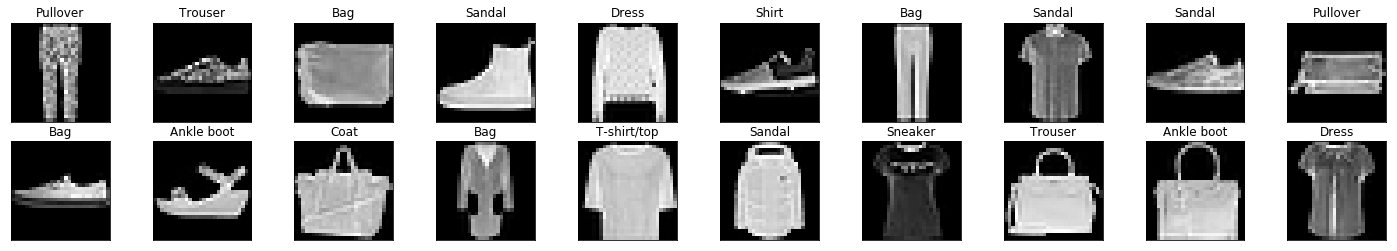

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)
images, label = dataiter.next()

images = images.numpy()
print(images.shape)

fig = plt.figure(figsize = (25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
    ax.set_title(classes[labels[idx]])

# Initialization Weights

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, hidden_1 = 256, hidden_2=128, constant_weight = None):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, 10)
        self.dropout = nn.Dropout(0.2)
        
        
        if (constant_weight is not None):
            for m in self.modules():
                if isinstance(m, nn.Linear):
                    nn.init.constant_(m.weight, constant_weight)
                    nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

# Comparing the model behavior